# Reproducibility Header

**Manuscript:** *AI and Supercomputing Are Powering the Next Wave of Breakthrough Science – But at What Cost?*  

**Authors:** S. Bianchini, A. Geuna, F. Shermatov  

**Paper:** (link to be added upon publication)  

**Last updated:** November 2025  

All figures in the main text (Figures 1–3) and those in Suppelementary Material can be regenerated by running this script end-to-end.

Notes:

  - Download the datasets from the project’s GitHub repository (link to be added).
  - Update the local path in the BASE = ... line before running the code.

---

In [1]:
# =========================================================
# Shared setup for all figures
# =========================================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# ---------------------------------------------------------
# Paths
# ---------------------------------------------------------
BASE = "/Users/sb/Desktop/AI_HPC"
DATA = f"{BASE}/Data"
FIGS = f"{BASE}/Figures"
os.makedirs(FIGS, exist_ok=True)

# ---------------------------------------------------------
# Colors 
# ---------------------------------------------------------
ai_color     = "#e08214"   # AI
hpc_color    = "#4393c3"   # HPC / compute
both_color   = "#bc80bd"   # AI+HPC
use_color    = "#1b7837"   # AI-Use
dev_color    = "#b2182b"   # AI-Development
all_color    = "#999999"   # All publications
flops_color  = "#984ea3"   # FLOPs inequality
count_color  = "#1b7837"   # HPC count (same green)

# ---------------------------------------------------------
# Generic helpers
# ---------------------------------------------------------
def style_ax(ax, tick_labelsize=9):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="both", direction="out", length=4, width=1, labelsize=tick_labelsize)
    ax.grid(False)

def abbreviate_subject(name):
    mapping = {
        "Computer Science": "Comp. Sci.",
        "Engineering": "Engineering.",
        "Materials Science": "Mat. Sci.",
        "Environmental Science": "Env. Sci.",
        "Social Sciences": "Soc. Sci.",
        "Earth and Planetary Sciences": "Earth/Plan.",
        "Decision Sciences": "Dec. Sci.",
        "Business, Management and Accounting": "Bus./Mgmt/Acct.",
        "Economics, Econometrics and Finance": "Econ./Fin.",
        "Chemical Engineering": "Chem. Eng.",
        "Energy": "Energy",
        "Mathematics": "Math.",
        "Multidisciplinary": "Multidisc.",
        "Medicine": "Medicine",
        "Neuroscience": "Neuroscience",
        "Physics and Astronomy": "Phys./Astro.",
        "Pharmacology, Toxicology and Pharmaceutics": "Pharm./Tox.",
        "Psychology": "Psychol.",
        "Biochemistry, Genetics and Molecular Biology": "Biochem./Gen.",
        "Agricultural and Biological Sciences": "Agri./Bio.",
        "Immunology and Microbiology": "Immun./Microbio.",
        "Health Professions": "Health Prof."
    }
    return mapping.get(name, name)

def top10_share(values):
    v = np.sort(np.asarray(values, float))[::-1]
    t = v.sum()
    return 0.0 if t == 0 else v[:10].sum() / t

def mld(values):
    """Mean Log Deviation (MLD), equivalent to GE(0)."""
    x = np.asarray(values, float)
    x = x[x > 0]
    n = x.size
    if n == 0:
        return np.nan
    mu = x.mean()
    y = x / mu
    return (1.0 / n) * np.sum(y * np.log(y))

---

# Figure 1


### Growth and convergence of AI and HPC in scientific research

Figure 1 traces the diffusion of AI and HPC across the scientific system. 

- **Panel 1a** shows that both AI- and HPC-related publications have grown exponentially since 2000.

- **Panel 1b** documents how the share of science that is AI- or HPC-powered has also increased over time.

- **Panel 1c** zooms in on the overlap between the two: an increasing share of HPC papers make use of AI techniques, and conversely, an increasing share of AI papers rely on HPC infrastructure. 

- **Panel 1d** further decomposes AI-related HPC work into “use” versus “development” papers, suggesting that most of the recent growth is driven by applied use of AI on supercomputers rather than by core methodological advances.

- **Panels 1e** show that this convergence is highly uneven across fields: computer science, physics, engineering and materials science concentrate the largest shares of AI, HPC, and especially AI+HPC work, while most other disciplines remain only weakly exposed.

---

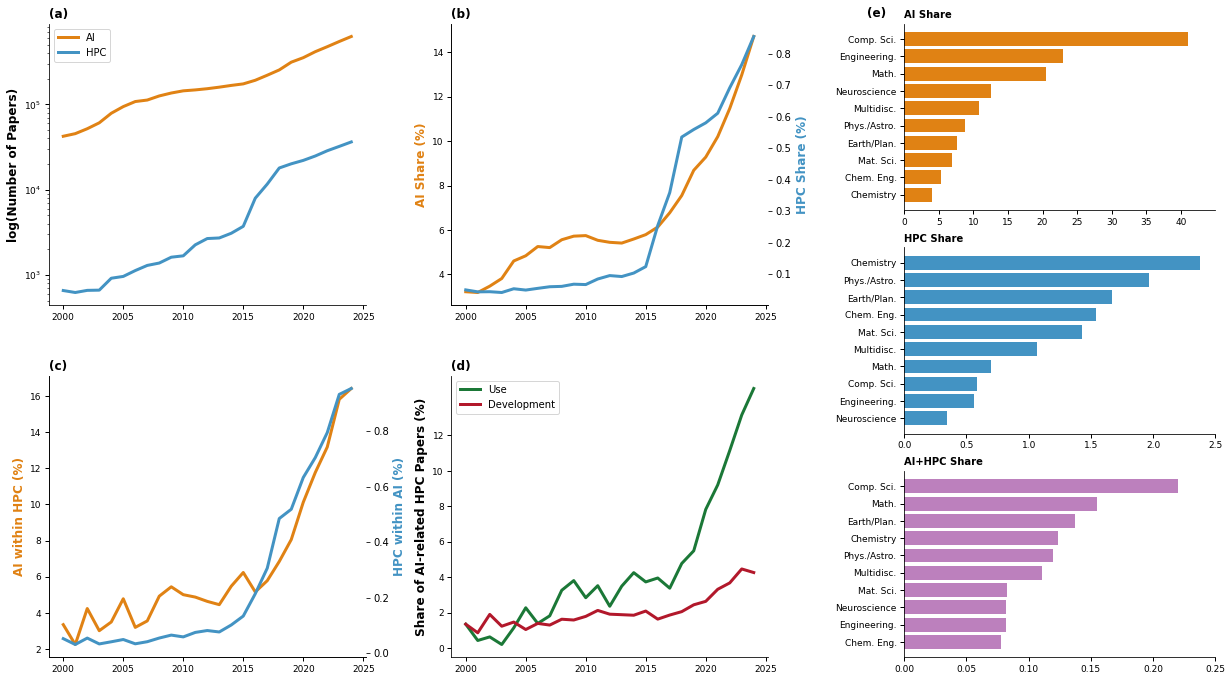

In [2]:
# =========================================================
# FIGURE 1
# =========================================================

# ---------------------------------------------------------
# Load data 
# ---------------------------------------------------------
df1 = pd.read_csv(f"{DATA}/df_figure_1a.csv")
df2 = pd.read_csv(f"{DATA}/df_figure_1b.csv")

# ---------------------------------------------------------
# Prepare top 20 subject areas
# ---------------------------------------------------------
df2_sorted = df2.sort_values("share_both", ascending=False).head(10).copy()
df2_sorted["subject_areas"] = df2_sorted["subject_areas"].apply(abbreviate_subject)

df_ai   = df2_sorted.sort_values("share_ai",   ascending=False)
df_hpc  = df2_sorted.sort_values("share_hpc",  ascending=False)
df_both = df2_sorted.sort_values("share_both", ascending=False)

# ---------------------------------------------------------
# Layout 
# ---------------------------------------------------------
fig = plt.figure(figsize=(18, 11))

tick_max = 8

gs_left = gridspec.GridSpec(
    2, 2,
    left=0.05,
    right=0.60,
    bottom=0.1,
    top=0.9,
    wspace=0.25,
    hspace=0.25
)

gs_right = gridspec.GridSpec(
    3, 1,
    left=0.71,
    right=0.95,
    bottom=0.1,
    top=0.9,
    hspace=0.20
)

# ---------------------------------------------------------
# Panel (a)
# ---------------------------------------------------------
ax_a = fig.add_subplot(gs_left[0, 0])
ax_a.plot(df1["year"], df1["ai_papers"],  label="AI",  color=ai_color,  lw=3)
ax_a.plot(df1["year"], df1["hpc_papers"], label="HPC", color=hpc_color, lw=3)
ax_a.set_yscale("log")
ax_a.set_ylabel("log(Number of Papers)", fontweight="bold", fontsize=12)
ax_a.set_title("(a)", loc="left", fontweight="bold", fontsize=12)
ax_a.legend(fontsize=10)
style_ax(ax_a)

# ---------------------------------------------------------
# Panel (b)
# ---------------------------------------------------------
ax_b = fig.add_subplot(gs_left[0, 1])
ax_b1 = ax_b
ax_b2 = ax_b1.twinx()
ax_b1.plot(df1["year"], df1["share_ai"],  color=ai_color,  lw=3)
ax_b2.plot(df1["year"], df1["share_hpc"], color=hpc_color, lw=3)
ax_b1.set_ylabel("AI Share (%)",  color=ai_color,  fontweight="bold", fontsize=12)
ax_b2.set_ylabel("HPC Share (%)", color=hpc_color, fontweight="bold", fontsize=12)
ax_b1.set_title("(b)", loc="left", fontweight="bold", fontsize=12)
style_ax(ax_b1)
ax_b2.tick_params(axis="y", direction="out", length=4, labelsize=10)
ax_b2.spines["top"].set_visible(False)
ax_b2.spines["right"].set_visible(False)
pos_b = ax_b.get_position()
ax_b.set_position([pos_b.x0 + 0.005, pos_b.y0, pos_b.width, pos_b.height])

# ---------------------------------------------------------
# Panel (c)
# ---------------------------------------------------------
ax_c = fig.add_subplot(gs_left[1, 0])
ax_c1 = ax_c
ax_c2 = ax_c1.twinx()
ax_c1.plot(df1["year"], df1["share_ai_within_hpc"], color=ai_color,  lw=3)
ax_c2.plot(df1["year"], df1["share_hpc_within_ai"], color=hpc_color, lw=3)
ax_c1.set_ylabel("AI within HPC (%)",  color=ai_color,  fontweight="bold", fontsize=12)
ax_c2.set_ylabel("HPC within AI (%)", color=hpc_color, fontweight="bold", fontsize=12)
ax_c1.set_title("(c)", loc="left", fontweight="bold", fontsize=12)
style_ax(ax_c1)
ax_c2.tick_params(axis="y", direction="out", length=4, labelsize=10)
ax_c2.spines["top"].set_visible(False)
ax_c2.spines["right"].set_visible(False)

# ---------------------------------------------------------
# Panel (d)
# ---------------------------------------------------------
ax_d = fig.add_subplot(gs_left[1, 1])
ax_d.plot(
    df1["year"],
    100 * df1["hpc_ai_use_gemma"] / df1["hpc_gemma_total"],
    label="Use",
    color=use_color,
    lw=3
)
ax_d.plot(
    df1["year"],
    100 * df1["hpc_ai_development_gemma"] / df1["hpc_gemma_total"],
    label="Development",
    color=dev_color,
    lw=3
)
ax_d.set_ylabel("Share of AI-related HPC Papers (%)", fontweight="bold", fontsize=12)
ax_d.set_title("(d)", loc="left", fontweight="bold", fontsize=12)
ax_d.set_yticks(np.arange(0, tick_max + 6, 2))
ax_d.legend(fontsize=10)
style_ax(ax_d)
pos_d = ax_d.get_position()
ax_d.set_position([pos_d.x0 + 0.005, pos_d.y0, pos_d.width, pos_d.height])

# ---------------------------------------------------------
# Panel (e1)
# ---------------------------------------------------------
ax_e1 = fig.add_subplot(gs_right[0])
y_ai = np.arange(len(df_ai))
ax_e1.barh(y_ai, df_ai["share_ai"] * 100, color=ai_color)
ax_e1.set_xlim(0, (df_ai["share_ai"] * 100).max() + 4)
ax_e1.set_yticks(y_ai)
ax_e1.set_yticklabels(df_ai["subject_areas"], fontsize=5)
ax_e1.invert_yaxis()
ax_e1.text(-0.12, 1.02, "(e)", transform=ax_e1.transAxes,
           fontsize=12, fontweight="bold", va="bottom", ha="left")
ax_e1.text(0, 1.02, "AI Share", transform=ax_e1.transAxes,
           fontsize=10, fontweight="bold", va="bottom", ha="left")
style_ax(ax_e1)

# ---------------------------------------------------------
# Panel (e2)
# ---------------------------------------------------------
ax_e2 = fig.add_subplot(gs_right[1])
y_hpc = np.arange(len(df_hpc))
ax_e2.barh(y_hpc, df_hpc["share_hpc"] * 100, color=hpc_color)
ax_e2.set_xlim(0, 2.5)
ax_e2.set_yticks(y_hpc)
ax_e2.set_yticklabels(df_hpc["subject_areas"], fontsize=5)
ax_e2.invert_yaxis()
ax_e2.set_title("HPC Share", loc="left", fontweight="bold", fontsize=10)
style_ax(ax_e2)

# ---------------------------------------------------------
# Panel (e3)
# ---------------------------------------------------------
ax_e3 = fig.add_subplot(gs_right[2])
y_both = np.arange(len(df_both))
ax_e3.barh(y_both, df_both["share_both"] * 100, color=both_color)
ax_e3.set_xlim(0, 0.25)
ax_e3.set_yticks(y_both)
ax_e3.set_yticklabels(df_both["subject_areas"], fontsize=5)
ax_e3.invert_yaxis()
ax_e3.set_title("AI+HPC Share", loc="left", fontweight="bold", fontsize=10)
style_ax(ax_e3)

plt.savefig(f"{FIGS}/Figure1.png", dpi=600, bbox_inches="tight")
plt.show()

---

# Figure 2

### Breakthrough potential in AI and HPC-powered science


Figure 2 examines how AI and HPC relate to breakthrough impact and novelty. 

- **Panel 2a** reports, by field, the share of papers that fall into the top 1% most cited, separately for AI-only, HPC-only, and combined AI+HPC work. In nearly all fields, AI+HPC papers are overrepresented among the top 1%—often several times above the 1% baseline—indicating a strong association with citation “hits”. 

- **Panel 2b** turns to novelty, measuring the share of papers that introduce new terms that are subsequently reused. Again, AI+HPC papers are systematically more likely to be novel than AI-only, HPC-only, or the field as a whole.

- **Panel 2c** summarises these relationships using regression-adjusted predictions: controlling for factors such as affiliation, prior citations, and year, papers that combine AI and HPC have the highest predicted probability of novelty, followed by AI-only and HPC-only papers, while work that uses neither technology has the lowest novelty.

---

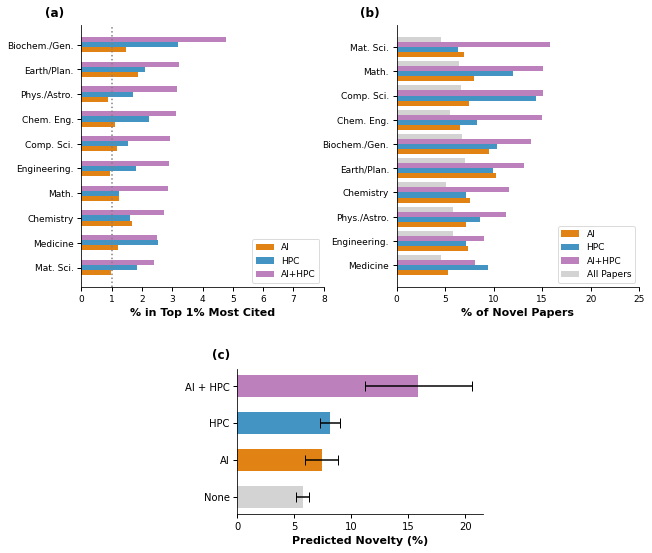

In [3]:
# =========================================================
# FIGURE 2
# =========================================================

# ---------------------------------------------------------
# Load data
# ---------------------------------------------------------
df_impact = pd.read_csv(f"{DATA}/df_figure_2a.csv")
df_novelty = pd.read_csv(f"{DATA}/df_figure_2b.csv")
df_synergy = pd.read_csv(f"{DATA}/df_figure_2c.csv", keep_default_na=False)

df_impact["subject_abbreviation"] = df_impact["subject_areas"].apply(abbreviate_subject)
df_novelty["subject_abbreviation"] = df_novelty["subject_areas"].apply(abbreviate_subject)

# ---------------------------------------------------------
# Select Top 10 
# ---------------------------------------------------------
df_impact_top10 = (
    df_impact.sort_values("hpc_ai_total", ascending=False)
    .head(10)
    .sort_values("hpc_ai_top1_share")
)
df_novelty_top10 = (
    df_novelty.sort_values("total_papers_hpc_ai", ascending=False)
    .head(10)
    .sort_values("new_word_share_hpc_ai")
)

# ---------------------------------------------------------
# Format data 
# ---------------------------------------------------------
df_synergy["group"] = df_synergy["group"].replace("", "None").fillna("None")
df_synergy["std_err"] = (df_synergy["upper"] - df_synergy["lower"]) / 2
df_synergy["group"] = pd.Categorical(
    df_synergy["group"],
    categories=["AI + HPC", "AI", "HPC", "None"],
    ordered=True
)
df_synergy = df_synergy.sort_values("predicted", ascending=False)

bar_width   = 0.25
row_spacing = 1.2
colors_synergy = {
    "AI + HPC": both_color,
    "AI": ai_color,
    "HPC": hpc_color,
    "None": "lightgray"
}

# ---------------------------------------------------------
# Layout
# ---------------------------------------------------------
fig = plt.figure(figsize=(10, 9))
gs = gridspec.GridSpec(
    2, 2,
    height_ratios=[1.8, 1],
    width_ratios=[1, 1],
    hspace=0.4,
    wspace=0.3
)

# ---------------------------------------------------------
# Panel (a)
# ---------------------------------------------------------
ax1 = fig.add_subplot(gs[0, 0])
y1 = np.arange(len(df_impact_top10)) * row_spacing
ax1.barh(y1 - bar_width, df_impact_top10["ai_top1_share"] * 100,
         height=bar_width, label="AI", color=ai_color)
ax1.barh(y1, df_impact_top10["hpc_top1_share"] * 100,
         height=bar_width, label="HPC", color=hpc_color)
ax1.barh(y1 + bar_width, df_impact_top10["hpc_ai_top1_share"] * 100,
         height=bar_width, label="AI+HPC", color=both_color)
ax1.set_yticks(y1)
ax1.set_yticklabels(df_impact_top10["subject_abbreviation"], fontsize=9)
ax1.set_xlabel("% in Top 1% Most Cited", fontsize=11, fontweight="bold")
ax1.set_xlim(0, 8)
ax1.axvline(1, color="grey", linestyle="dotted")
ax1.text(-0.15, 1.02, "(a)", transform=ax1.transAxes,
         fontsize=12, fontweight="bold", va="bottom", ha="left")
ax1.legend(fontsize=9, loc="lower right",
           frameon=True, facecolor="white", edgecolor="lightgrey")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(axis="both", direction="out", length=4, width=1, labelsize=9)
ax1.grid(False)

# ---------------------------------------------------------
# Panel (b)
# ---------------------------------------------------------
ax2 = fig.add_subplot(gs[0, 1])
y2 = np.arange(len(df_novelty_top10)) * row_spacing
ax2.barh(y2 - 1.5 * bar_width, df_novelty_top10["new_word_share_ai"] * 100,
         height=bar_width, label="AI", color=ai_color)
ax2.barh(y2 - 0.5 * bar_width, df_novelty_top10["new_word_share_hpc"] * 100,
         height=bar_width, label="HPC", color=hpc_color)
ax2.barh(y2 + 0.5 * bar_width, df_novelty_top10["new_word_share_hpc_ai"] * 100,
         height=bar_width, label="AI+HPC", color=both_color)
ax2.barh(y2 + 1.5 * bar_width, df_novelty_top10["new_word_share_top1"] * 100,
         height=bar_width, label="All Papers", color="lightgray")
ax2.set_yticks(y2)
ax2.set_yticklabels(df_novelty_top10["subject_abbreviation"], fontsize=9)
ax2.set_xlabel("% of Novel Papers", fontsize=11, fontweight="bold")
ax2.set_xlim(0, 25)
ax2.text(-0.15, 1.02, "(b)", transform=ax2.transAxes,
         fontsize=12, fontweight="bold", va="bottom", ha="left")
ax2.legend(fontsize=9, loc="lower right",
           frameon=True, facecolor="white", edgecolor="lightgrey")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.tick_params(axis="both", direction="out", length=4, width=1, labelsize=9)
ax2.grid(False)

# ---------------------------------------------------------
# Panel (c) 
# ---------------------------------------------------------
gs_bottom = gridspec.GridSpecFromSubplotSpec(
    1, 3, subplot_spec=gs[1, :], width_ratios=[0.25, 0.5, 0.25]
)
ax3 = fig.add_subplot(gs_bottom[0, 1])

effect = df_synergy["predicted"] * 100
se     = df_synergy["std_err"] * 100
groups = df_synergy["group"]
y3     = np.arange(len(groups))
bar_colors_synergy = [colors_synergy[g] for g in groups]

ax3.barh(y3, effect, xerr=se, color=bar_colors_synergy, capsize=5, height=0.6)
ax3.set_yticks(y3)
ax3.set_yticklabels(groups, fontsize=10)
ax3.set_xlabel("Predicted Novelty (%)", fontsize=11, fontweight="bold")
ax3.invert_yaxis()
ax3.text(-0.1, 1.05, "(c)", transform=ax3.transAxes,
         fontsize=12, fontweight="bold", va="bottom", ha="left")
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.tick_params(axis="both", direction="out", length=4, width=1)
ax3.grid(False)

# ---------------------------------------------------------
# Save / show
# ---------------------------------------------------------
plt.savefig(f"{FIGS}/Figure2.png", dpi=600, bbox_inches="tight")
plt.show()

---

# Figure 3


### Global inequality in computational resources and AI/HPC-powered science

Figure 3 links the benefits shown above to a growing stratification in access to compute and in scientific output.

- **Panel 3a** shows the evolution of inequality in HPC capacity across countries, measured using the Mean Log Deviation for both the number of systems and their FLOPs: both curves trend upward, indicating that a shrinking group of countries accounts for an ever-larger share of global supercomputing power. 

- **Panel 3b** makes this concentration visible by listing the top 10 countries by cumulative FLOPs, which together dominate global capacity. 

- **Panel 3c** presents analogous inequality measures for publications, showing that cross-country inequality in AI and HPC research has risen markedly since 2000, while inequality in overall scientific output has remained relatively stable or even declined slightly. 

- **Panel 3d** complements this by ranking countries by their cumulative AI and HPC publications, again revealing a highly skewed distribution. Taken together, the three figures show that AI and HPC are becoming central engines of breakthrough science, but in a way that is tightly coupled to highly concentrated computational resources and research capacity.

---

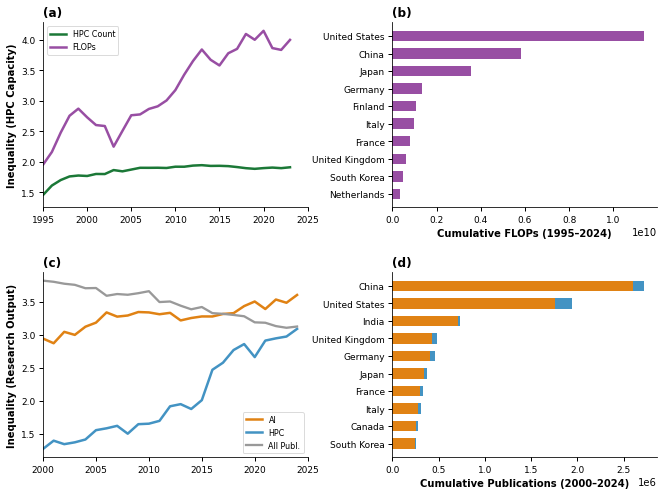

In [4]:
# =========================================================
# FIGURE 3
# =========================================================

# ---------------------------------------------------------
# Load data
# ---------------------------------------------------------
compute_ineq_file = f"{DATA}/df_figure_3a.csv"
compute_file      = f"{DATA}/df_figure_3b.csv"
pubs_file         = f"{DATA}/df_figure_3c.csv"
ineq_pub_file     = f"{DATA}/df_figure_3d.csv"

# --- Load 1: Inequality metrics for compute (FLOPs) ---
dfci = pd.read_csv(compute_ineq_file)
dfci.columns = [c.strip().lower() for c in dfci.columns]
dfci = dfci.rename(columns={"g_entropy _mld": "mld_flops"})
dfci = dfci.sort_values("year")
compute_years = dfci["year"].values
mld_flops     = dfci["mld_flops"].values

# --- Load 2: Compute dataset (for HPC counts + FLOPs) ---
dfc = pd.read_csv(compute_file)
dfc.columns = dfc.columns.str.lower()

dfc["year"]             = dfc["year"].astype(int)
dfc["total_flops"]      = pd.to_numeric(dfc["total_flops"], errors="coerce").fillna(0)
dfc["cumulative_number"] = pd.to_numeric(dfc["cumulative_number"], errors="coerce").fillna(0)

# --- MLD for HPC counts by year ---
mld_count = []
for yr in compute_years:
    df_yr = dfc[dfc["year"] == yr]
    count_vals = df_yr.groupby("country")["cumulative_number"].sum().values
    mld_count.append(mld(count_vals))
mld_count = np.array(mld_count)

# --- Top 10 cumulative FLOPs ---
cum_flops = (
    dfc.groupby("country")["total_flops"]
       .sum()
       .sort_values(ascending=False)
       .head(10)
)
countries_top10_flops = cum_flops.index.tolist()
vals_top10_flops      = cum_flops.values

# --- Load 3: Publication inequality (MLD for AI, HPC, All) ---
ineqpub = pd.read_csv(ineq_pub_file)
ineqpub.columns = ineqpub.columns.str.lower()

ineqpub["year"]  = ineqpub["year"].astype(int)
ineqpub["index"] = ineqpub["index"].str.strip().str.lower()
ineqpub["field"] = ineqpub["field"].str.strip().str.lower()

ineqpub = ineqpub[ineqpub["index"].isin(["mld", "ge0", "ge_mld", "g_entropy _mld"])]
ineqpub = ineqpub[ineqpub["field"].isin(["ai", "hpc", "all"])].copy()
ineqpub = ineqpub.sort_values("year")
ineqpub = ineqpub[(ineqpub["year"] >= 2000) & (ineqpub["year"] <= 2024)]
pub_years = ineqpub["year"].unique()

def extract_mld(field):
    s = ineqpub[ineqpub["field"] == field][["year", "value"]]
    s = s.drop_duplicates("year").set_index("year")["value"]
    return s.reindex(pub_years).astype(float).values

mld_ai  = extract_mld("ai")
mld_hpc = extract_mld("hpc")
mld_all = extract_mld("all")

# --- Load 4: Publication counts (Top 10 cumulative pubs) ---
dfp = pd.read_csv(pubs_file)
dfp.columns = dfp.columns.str.lower()
dfp["publication_count"] = pd.to_numeric(dfp["publication_count"], errors="coerce").fillna(0)

df_ai  = dfp[dfp["description"] == "ai"].groupby("country")["publication_count"].sum()
df_hpc = dfp[dfp["description"] == "hpc"].groupby("country")["publication_count"].sum()

stack = pd.concat([df_ai.rename("ai"), df_hpc.rename("hpc")], axis=1).fillna(0)
stack["total"] = stack["ai"] + stack["hpc"]
stack = stack.sort_values("total", ascending=False).head(10)

countries_pubs = stack.index.tolist()
ai_pubs_vals   = stack["ai"].values
hpc_pubs_vals  = stack["hpc"].values

# ---------------------------------------------------------
# Layout
# ---------------------------------------------------------
fig = plt.figure(figsize=(11, 8))
gs  = gridspec.GridSpec(2, 2, hspace=0.35, wspace=0.32)

# ---------------------------------------------------------
# Panel (a) 
# ---------------------------------------------------------
ax = fig.add_subplot(gs[0, 0])
ax.plot(compute_years, mld_count, color=count_color,  lw=2.5, label="HPC Count")
ax.plot(compute_years, mld_flops, color=flops_color, lw=2.5, label="FLOPs")
ax.set_title("(a)", loc="left", fontweight="bold")
ax.set_ylabel("Inequality (HPC Capacity)", fontweight="bold")
ax.set_xlim(1995, 2025)
ax.legend(
    loc="upper left", fontsize=8,
    frameon=True, facecolor="white", edgecolor="lightgrey"
)
style_ax(ax)

# ---------------------------------------------------------
# Panel (b) 
# ---------------------------------------------------------
ax = fig.add_subplot(gs[0, 1])
y = np.arange(len(countries_top10_flops))
ax.barh(y, vals_top10_flops, color=flops_color, height=0.6)
ax.set_yticks(y)
ax.set_yticklabels(countries_top10_flops, fontsize=8)
ax.invert_yaxis()
ax.set_title("(b)", loc="left", fontweight="bold")
ax.set_xlabel("Cumulative FLOPs (1995–2024)", fontweight="bold")
style_ax(ax)

# ---------------------------------------------------------
# Panel (c) 
# ---------------------------------------------------------
ax = fig.add_subplot(gs[1, 0])
ax.plot(pub_years, mld_ai,  color=ai_color,  lw=2.5, label="AI")
ax.plot(pub_years, mld_hpc, color=hpc_color, lw=2.5, label="HPC")
ax.plot(pub_years, mld_all, color=all_color, lw=2.3, label="All Publ.")
ax.set_title("(c)", loc="left", fontweight="bold")
ax.set_ylabel("Inequality (Research Output)", fontweight="bold")
ax.set_xlim(2000, 2025)
ax.legend(
    loc="lower right", fontsize=8,
    frameon=True, facecolor="white", edgecolor="lightgrey"
)
style_ax(ax)

# ---------------------------------------------------------
# Panel (d) 
# ---------------------------------------------------------
ax = fig.add_subplot(gs[1, 1])
y = np.arange(len(countries_pubs))
ax.barh(y, ai_pubs_vals,  color=ai_color,  height=0.6, label="AI")
ax.barh(y, hpc_pubs_vals, color=hpc_color, left=ai_pubs_vals, height=0.6, label="HPC")
ax.set_yticks(y)
ax.set_yticklabels(countries_pubs, fontsize=8)
ax.invert_yaxis()
ax.set_title("(d)", loc="left", fontweight="bold")
ax.set_xlabel("Cumulative Publications (2000–2024)", fontweight="bold")
style_ax(ax)

# ---------------------------------------------------------
# Save / show 
# ---------------------------------------------------------
plt.savefig(f"{FIGS}/Figure3.png", dpi=600, bbox_inches="tight")
plt.show()

---

# Other figures in Supplementary Materials (SM)

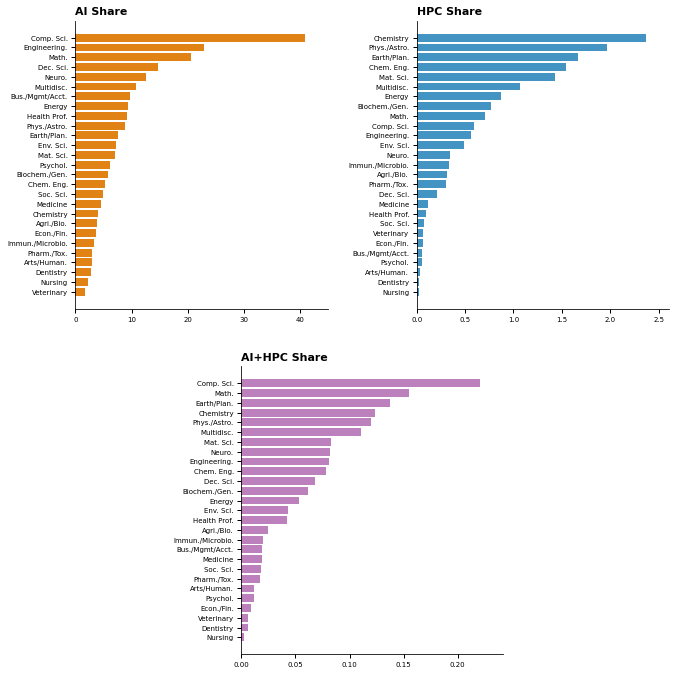

In [5]:
# =========================================================
# FIGURE 1SM 
# =========================================================

# ---------------------------------------------------------
# Load data 
# ---------------------------------------------------------
df2 = pd.read_csv(f"{DATA}/df_figure_1b.csv")

# ---------------------------------------------------------
# Abbreviate field names 
# ---------------------------------------------------------
def abbreviate_subject(name):
    mapping = {
        "Computer Science": "Comp. Sci.",
        "Engineering": "Engineering.",
        "Materials Science": "Mat. Sci.",
        "Environmental Science": "Env. Sci.",
        "Social Sciences": "Soc. Sci.",
        "Earth and Planetary Sciences": "Earth/Plan.",
        "Decision Sciences": "Dec. Sci.",
        "Business, Management and Accounting": "Bus./Mgmt/Acct.",
        "Economics, Econometrics and Finance": "Econ./Fin.",
        "Chemical Engineering": "Chem. Eng.",
        "Energy": "Energy",
        "Mathematics": "Math.",
        "Multidisciplinary": "Multidisc.",
        "Medicine": "Medicine",
        "Neuroscience": "Neuro.",
        "Physics and Astronomy": "Phys./Astro.",
        "Pharmacology, Toxicology and Pharmaceutics": "Pharm./Tox.",
        "Psychology": "Psychol.",
        "Biochemistry, Genetics and Molecular Biology": "Biochem./Gen.",
        "Agricultural and Biological Sciences": "Agri./Bio.",
        "Immunology and Microbiology": "Immun./Microbio.",
        "Health Professions": "Health Prof.",
        "Arts and Humanities": "Arts/Human."
    }
    return mapping.get(name, name)

df2["subject_areas"] = df2["subject_areas"].apply(abbreviate_subject)

# ---------------------------------------------------------
# Sort by shares (all fields) 
# ---------------------------------------------------------
df2_sorted = df2.sort_values("share_both", ascending=False).copy()
df_ai   = df2_sorted.sort_values("share_ai",   ascending=False)
df_hpc  = df2_sorted.sort_values("share_hpc",  ascending=False)
df_both = df2_sorted.sort_values("share_both", ascending=False)

# ---------------------------------------------------------
# Layout 
# ---------------------------------------------------------
fig = plt.figure(figsize=(11, 10))

gs_main = gridspec.GridSpec(
    2, 2,
    left=0.20,
    right=0.95,
    bottom=0.08,
    top=0.96,
    hspace=0.20,
    wspace=0.35
)

def style_ax(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="both", direction="out", length=4, width=1, labelsize=7)
    ax.grid(False)

# ---------------------------------------------------------   
# Top-left: AI share
# ---------------------------------------------------------
ax_ai = fig.add_subplot(gs_main[0, 0])
y_ai = np.arange(len(df_ai))
ax_ai.barh(y_ai, df_ai["share_ai"] * 100, color=ai_color)
ax_ai.set_xlim(0, (df_ai["share_ai"] * 100).max() * 1.1)
ax_ai.set_yticks(y_ai)
ax_ai.set_yticklabels(df_ai["subject_areas"], fontsize=7)
ax_ai.invert_yaxis()
ax_ai.set_title("AI Share", loc="left", fontweight="bold", fontsize=11)
style_ax(ax_ai)

# ---------------------------------------------------------
# Top-right: HPC share
# ---------------------------------------------------------
ax_hpc = fig.add_subplot(gs_main[0, 1])
y_hpc = np.arange(len(df_hpc))
ax_hpc.barh(y_hpc, df_hpc["share_hpc"] * 100, color=hpc_color)
ax_hpc.set_xlim(0, (df_hpc["share_hpc"] * 100).max() * 1.1)
ax_hpc.set_yticks(y_hpc)
ax_hpc.set_yticklabels(df_hpc["subject_areas"], fontsize=7)
ax_hpc.invert_yaxis()
ax_hpc.set_title("HPC Share", loc="left", fontweight="bold", fontsize=11)
style_ax(ax_hpc)

# ---------------------------------------------------------
# Bottom: AI+HPC share 
# ---------------------------------------------------------
gs_bottom = gridspec.GridSpecFromSubplotSpec(
    1, 3, subplot_spec=gs_main[1, :], width_ratios=[0.25, 0.5, 0.25]
)
ax_both = fig.add_subplot(gs_bottom[0, 1])  # middle cell

y_both = np.arange(len(df_both))
ax_both.barh(y_both, df_both["share_both"] * 100, color=both_color)
ax_both.set_xlim(0, (df_both["share_both"] * 100).max() * 1.1)
ax_both.set_yticks(y_both)
ax_both.set_yticklabels(df_both["subject_areas"], fontsize=7)
ax_both.invert_yaxis()
ax_both.set_title("AI+HPC Share", loc="left", fontweight="bold", fontsize=11)
style_ax(ax_both)

# ---------------------------------------------------------
# Save / show 
# ---------------------------------------------------------
plt.savefig(f"{FIGS}/Figure_sm1.png", dpi=600, bbox_inches="tight")
plt.show()

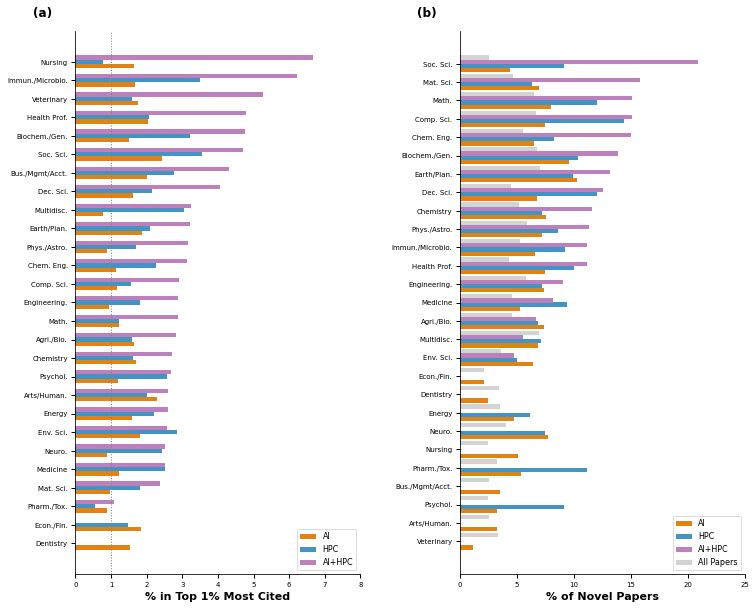

In [6]:
# =========================================================
# FIGURE 2SM 
# =========================================================

# ---------------------------------------------------------
# Load data
# ---------------------------------------------------------
df_impact  = pd.read_csv(f"{DATA}/df_figure_2a.csv")
df_novelty = pd.read_csv(f"{DATA}/df_figure_2b.csv")

# ---------------------------------------------------------
# Clean subject_areas 
# ---------------------------------------------------------
for name, df in (("impact", df_impact), ("novelty", df_novelty)):
    df = df.dropna(subset=["subject_areas"]).copy()
    df = df[df["subject_areas"].astype(str).str.lower() != "nan"]
    if name == "impact":
        df_impact = df
    else:
        df_novelty = df

df_impact["hpc_ai_top1_share"]        = pd.to_numeric(df_impact["hpc_ai_top1_share"], errors="coerce").fillna(0)
df_novelty["new_word_share_hpc_ai"]   = pd.to_numeric(df_novelty["new_word_share_hpc_ai"], errors="coerce").fillna(0)

# ---------------------------------------------------------
# Ranking for each panel 
# ---------------------------------------------------------

# Panel (a): rank by AI+HPC share in top 1% (descending)
df_impact_ord = df_impact.sort_values("hpc_ai_top1_share", ascending=True).copy()
df_impact_ord["subject_abbreviation"] = df_impact_ord["subject_areas"].apply(abbreviate_subject)

# Panel (b): rank by AI+HPC share of novel papers (descending)
df_novelty_ord = df_novelty.sort_values("new_word_share_hpc_ai", ascending=True).copy()
df_novelty_ord["subject_abbreviation"] = df_novelty_ord["subject_areas"].apply(abbreviate_subject)

# ---------------------------------------------------------
# Layout
# ---------------------------------------------------------
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.35)

bar_width   = 0.25
row_spacing = 1.1

# ---------------------------------------------------------
# Panel (a)
# ---------------------------------------------------------
ax1 = fig.add_subplot(gs[0])
y1 = np.arange(len(df_impact_ord)) * row_spacing

ax1.barh(
    y1 - bar_width,
    df_impact_ord["ai_top1_share"] * 100,
    height=bar_width,
    label="AI",
    color=ai_color
)
ax1.barh(
    y1,
    df_impact_ord["hpc_top1_share"] * 100,
    height=bar_width,
    label="HPC",
    color=hpc_color
)
ax1.barh(
    y1 + bar_width,
    df_impact_ord["hpc_ai_top1_share"] * 100,
    height=bar_width,
    label="AI+HPC",
    color=both_color
)

ax1.set_yticks(y1)
ax1.set_yticklabels(df_impact_ord["subject_abbreviation"], fontsize=8)
ax1.set_xlabel("% in Top 1% Most Cited", fontsize=11, fontweight="bold")
ax1.set_xlim(0, 8)

ax1.axvline(1, color="grey", linestyle="dotted", linewidth=1)  # 1% baseline
ax1.text(-0.15, 1.02, "(a)", transform=ax1.transAxes,
         fontsize=12, fontweight="bold", va="bottom", ha="left")

ax1.legend(
    fontsize=8,
    loc="lower right",
    frameon=True,
    facecolor="white",
    edgecolor="lightgrey"
)

style_ax(ax1)

# ---------------------------------------------------------
# Panel (b)
# ---------------------------------------------------------

ax2 = fig.add_subplot(gs[1])

y2 = np.arange(len(df_novelty_ord)) * row_spacing

ax2.barh(
    y2 - 1.5 * bar_width,
    df_novelty_ord["new_word_share_ai"] * 100,
    height=bar_width,
    label="AI",
    color=ai_color
)
ax2.barh(
    y2 - 0.5 * bar_width,
    df_novelty_ord["new_word_share_hpc"] * 100,
    height=bar_width,
    label="HPC",
    color=hpc_color
)
ax2.barh(
    y2 + 0.5 * bar_width,
    df_novelty_ord["new_word_share_hpc_ai"] * 100,
    height=bar_width,
    label="AI+HPC",
    color=both_color
)
ax2.barh(
    y2 + 1.5 * bar_width,
    df_novelty_ord["new_word_share_top1"] * 100,
    height=bar_width,
    label="All Papers",
    color="lightgray"
)

ax2.set_yticks(y2)
ax2.set_yticklabels(df_novelty_ord["subject_abbreviation"], fontsize=8)
ax2.set_xlabel("% of Novel Papers", fontsize=11, fontweight="bold")
ax2.set_xlim(0, 25)

ax2.text(-0.15, 1.02, "(b)", transform=ax2.transAxes,
         fontsize=12, fontweight="bold", va="bottom", ha="left")

ax2.legend(
    fontsize=8,
    loc="lower right",
    frameon=True,
    facecolor="white",
    edgecolor="lightgrey"
)

style_ax(ax2)

# ---------------------------------------------------------
# Save / show 
# ---------------------------------------------------------
plt.savefig(f"{FIGS}/Figure_sm2.png", dpi=600, bbox_inches="tight")
plt.show()

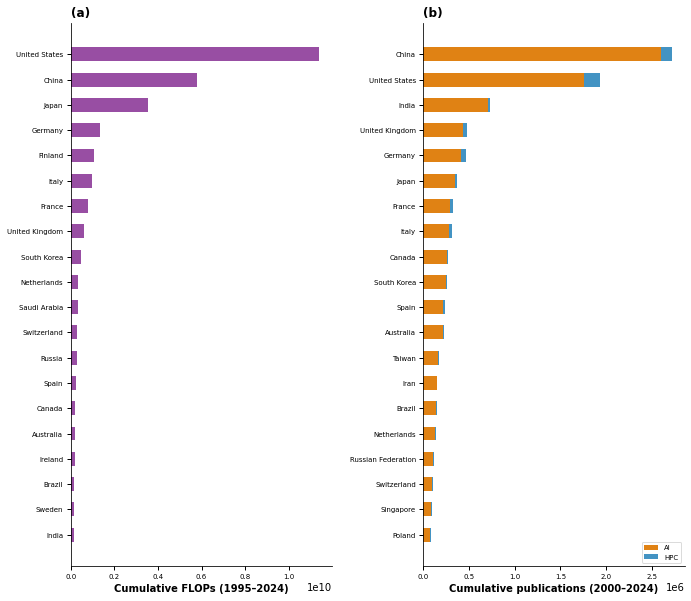

In [7]:
# =========================================================
# FIGURE 3SM 
# =========================================================

# ---------------------------------------------------------
# Choose how many countries you want
# ---------------------------------------------------------
TOP_N = 20   

# ---------------------------------------------------------
# Load data 
# ---------------------------------------------------------
compute_file  = f"{DATA}/df_figure_3b.csv"
pubs_file     = f"{DATA}/df_figure_3c.csv"

# --- Helper function ---
def style_ax(ax, tick_labelsize=8):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="both", direction="out", length=4, width=1,
                   labelsize=tick_labelsize)
    ax.grid(False)

# ---- Load compute data (Top N FLOPs) ----
dfc = pd.read_csv(compute_file)
dfc.columns = dfc.columns.str.lower()
dfc["total_flops"] = pd.to_numeric(dfc["total_flops"], errors="coerce").fillna(0)

cum_flops = (
    dfc.groupby("country")["total_flops"]
       .sum()
       .sort_values(ascending=False)
       .head(TOP_N)
)

countries_flops = cum_flops.index.tolist()
vals_flops      = cum_flops.values

# ---- Load publication data (Top N AI+HPC publications) ----
dfp = pd.read_csv(pubs_file)
dfp.columns = dfp.columns.str.lower()
dfp["publication_count"] = pd.to_numeric(dfp["publication_count"],
                                         errors="coerce").fillna(0)

df_ai  = dfp[dfp["description"] == "ai"].groupby("country")["publication_count"].sum()
df_hpc = dfp[dfp["description"] == "hpc"].groupby("country")["publication_count"].sum()

stack = pd.concat([df_ai.rename("ai"), df_hpc.rename("hpc")], axis=1).fillna(0)
stack["total"] = stack["ai"] + stack["hpc"]
stack = stack.sort_values("total", ascending=False).head(TOP_N)

countries_pubs = stack.index.tolist()
ai_vals        = stack["ai"].values
hpc_vals       = stack["hpc"].values

# ---------------------------------------------------------
# Layout
# ---------------------------------------------------------
fig = plt.figure(figsize=(11, 10))
gs  = gridspec.GridSpec(1, 2, wspace=0.35)

# ---------------------------------------------------------
# Panel (a) 
# ---------------------------------------------------------
ax = fig.add_subplot(gs[0, 0])
y = np.arange(len(countries_flops))
ax.barh(y, vals_flops, color=flops_color, height=0.55)

ax.set_yticks(y)
ax.set_yticklabels(countries_flops, fontsize=7)
ax.invert_yaxis()
ax.set_title("(a)",
             loc="left", fontweight="bold")
ax.set_xlabel("Cumulative FLOPs (1995–2024)", fontweight="bold")

style_ax(ax, tick_labelsize=7)

# ---------------------------------------------------------
# Panel (b) 
# ---------------------------------------------------------
ax = fig.add_subplot(gs[0, 1])
y = np.arange(len(countries_pubs))

ax.barh(y, ai_vals,  color=ai_color,  height=0.55, label="AI")
ax.barh(y, hpc_vals, color=hpc_color, left=ai_vals,
        height=0.55, label="HPC")

ax.set_yticks(y)
ax.set_yticklabels(countries_pubs, fontsize=7)
ax.invert_yaxis()
ax.set_title("(b)",
             loc="left", fontweight="bold")
ax.set_xlabel("Cumulative publications (2000–2024)", fontweight="bold")

ax.legend(loc="lower right", fontsize=7, frameon=True,
          facecolor="white", edgecolor="lightgrey")
style_ax(ax, tick_labelsize=7)

# ---------------------------------------------------------
# Save / show
# ---------------------------------------------------------
plt.savefig(f"{FIGS}/Figure_sm3.png", dpi=600, bbox_inches="tight")
plt.show()